In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [3]:
print(os.listdir('/content/drive/MyDrive/Projects/Stock Prediction'))

['Apple.txt', 'Microsoft.txt', 'Stock Market Financial Anlaysis.ipynb', 'Google.txt']


,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [5]:
microsoft_data=pd.read_csv("/content/drive/MyDrive/Projects/Stock Prediction/Microsoft.txt",sep=",")
microsoft_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [6]:
apple_data=pd.read_csv("/content/drive/MyDrive/Projects/Stock Prediction/Apple.txt",sep=",")
apple_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


#Google data

In [4]:
google_data=pd.read_csv("/content/drive/MyDrive/Projects/Stock Prediction/Google.txt",sep=",")
google_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


1. Candlestick Chart


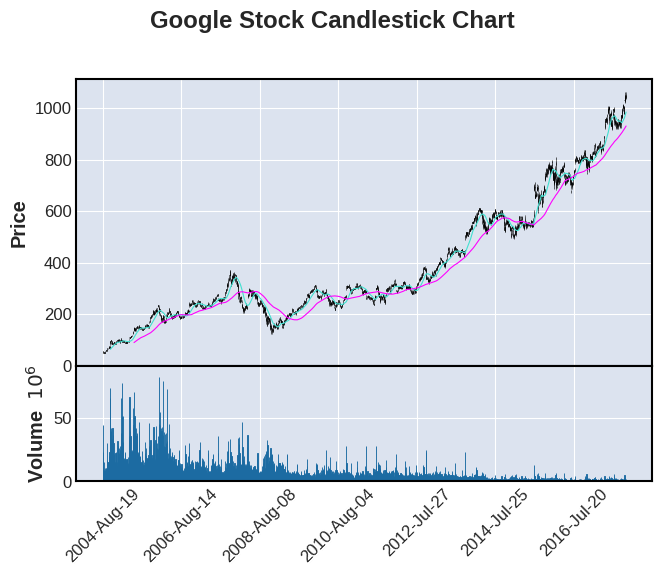

In [8]:
mpf.plot(google_data, type='candle', title='Google Stock Candlestick Chart', mav=(50, 200), volume=True, warn_too_much_data=len(google_data)+1)


2. Moving Average Plot


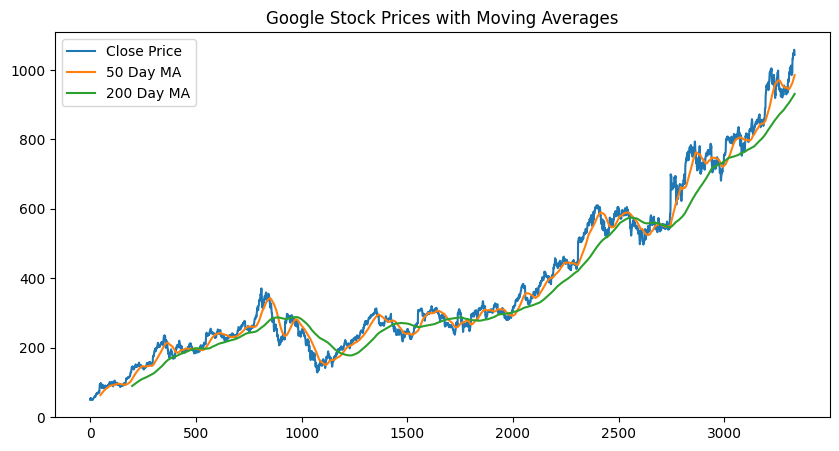

In [8]:
import matplotlib.pyplot as plt

# Calculate moving averages
google_data['MA50'] = google_data['Close'].rolling(50).mean()
google_data['MA200'] = google_data['Close'].rolling(200).mean()

# Plot
plt.figure(figsize=(10,5))
plt.plot(google_data['Close'], label='Close Price')
plt.plot(google_data['MA50'], label='50 Day MA')
plt.plot(google_data['MA200'], label='200 Day MA')
plt.title('Google Stock Prices with Moving Averages')
plt.legend()
plt.show()


3. Volume Chart


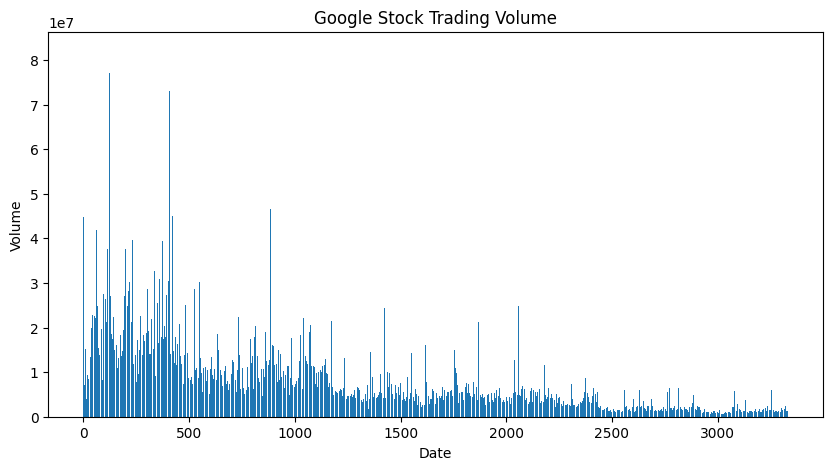

In [9]:
plt.figure(figsize=(10,5))
plt.bar(google_data.index, google_data['Volume'])
plt.title('Google Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


4. Price Change Distribution


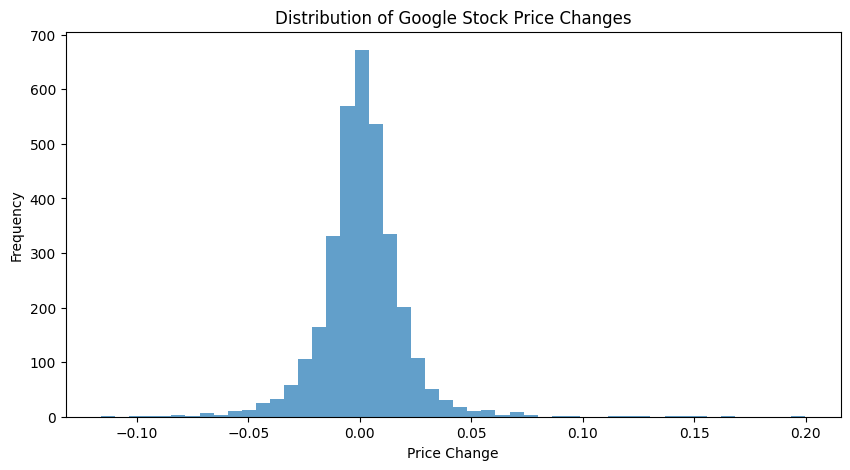

In [10]:
# Calculate daily price change
google_data['Price Change'] = google_data['Close'].pct_change()

# Plot
plt.figure(figsize=(10,5))
plt.hist(google_data['Price Change'], bins=50, alpha=0.7)
plt.title('Distribution of Google Stock Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()


5. Volatility Plot


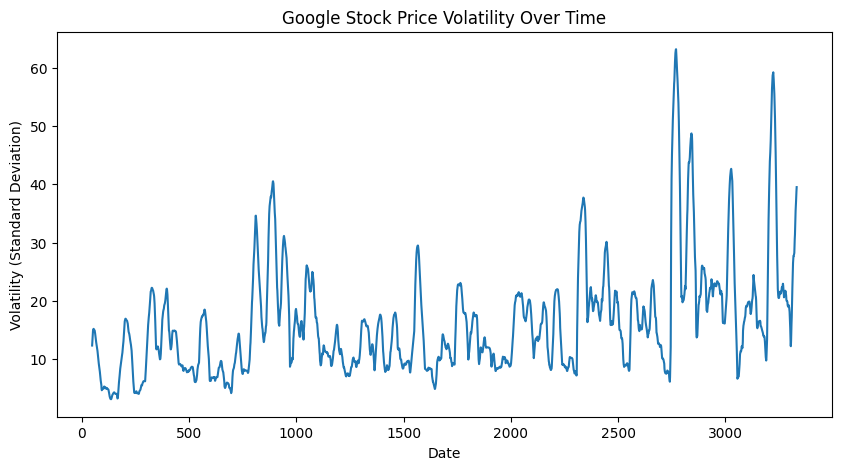

In [11]:
google_data['Volatility'] = google_data['Close'].rolling(window=50).std()

plt.figure(figsize=(10,5))
plt.plot(google_data['Volatility'])
plt.title('Google Stock Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.show()


6. Return Rate Plot


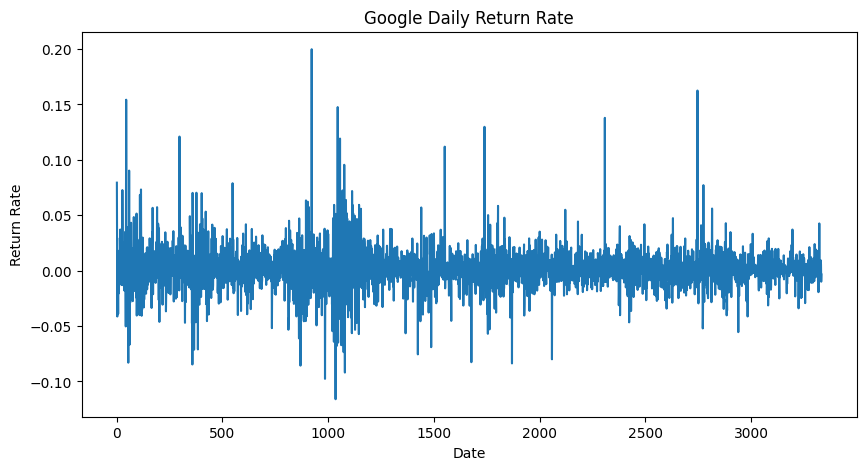

In [12]:
google_data['Daily Return'] = google_data['Close'].pct_change()

plt.figure(figsize=(10,5))
plt.plot(google_data['Daily Return'])
plt.title('Google Daily Return Rate')
plt.xlabel('Date')
plt.ylabel('Return Rate')
plt.show()


#Microsoft data

#Apple Data

#Comparison of stock

1. Overlay Time Series


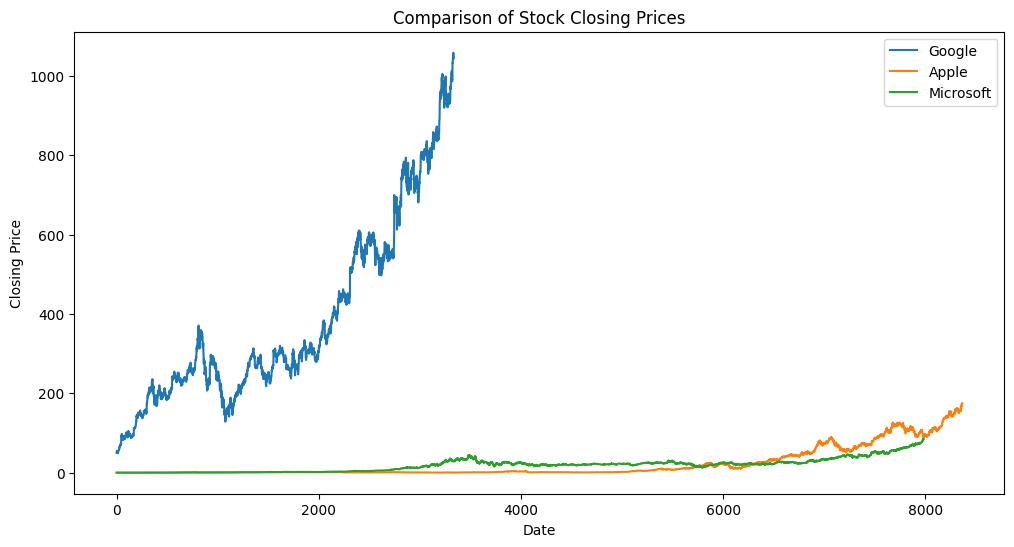

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(google_data['Close'], label='Google')
plt.plot(apple_data['Close'], label='Apple')
plt.plot(microsoft_data['Close'], label='Microsoft')
plt.title('Comparison of Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


2. Normalized Price Comparison


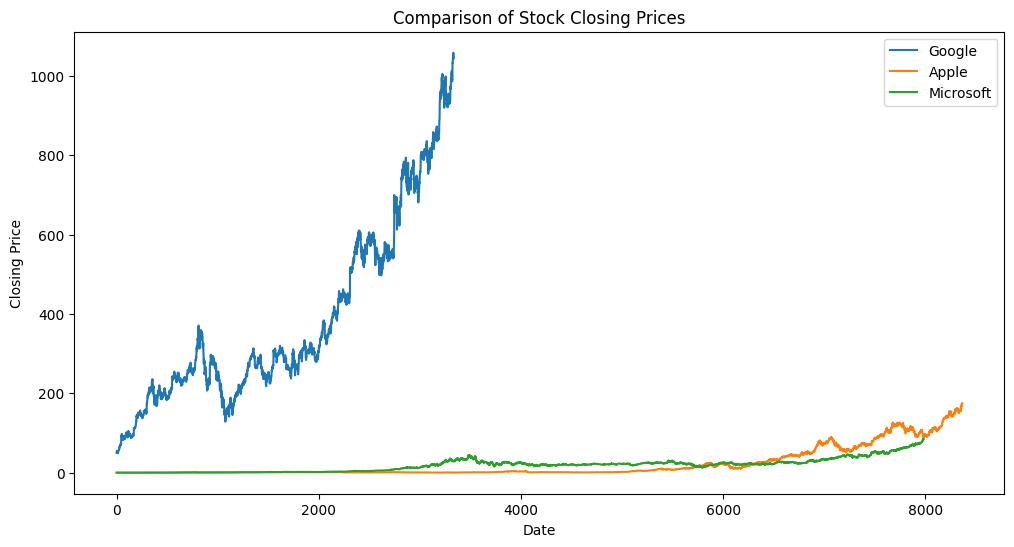

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(google_data['Close'], label='Google')
plt.plot(apple_data['Close'], label='Apple')
plt.plot(microsoft_data['Close'], label='Microsoft')
plt.title('Comparison of Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


3. Correlation Matrix


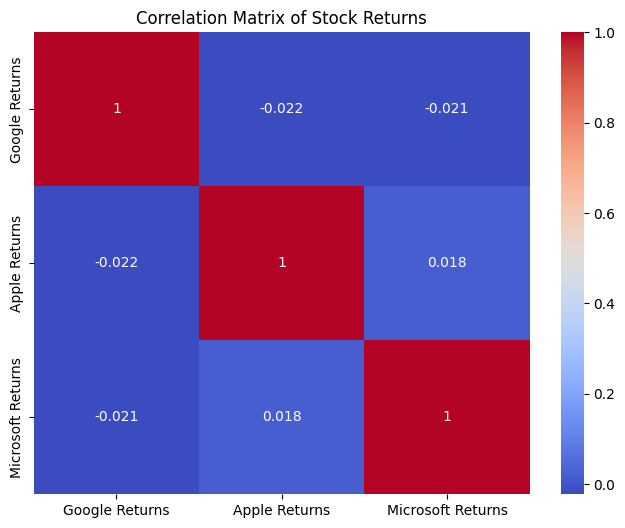

In [15]:
returns = pd.DataFrame()
returns['Google Returns'] = google_data['Close'].pct_change()
returns['Apple Returns'] = apple_data['Close'].pct_change()
returns['Microsoft Returns'] = microsoft_data['Close'].pct_change()

correlation = returns.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Returns')
plt.show()


4. Cumulative Returns Plot


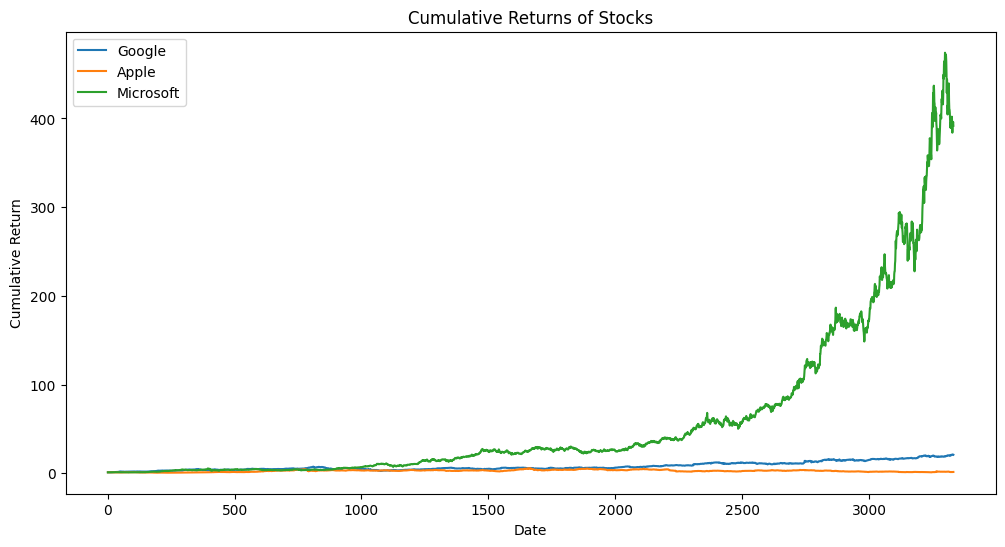

In [16]:
plt.figure(figsize=(12,6))
plt.plot((1 + returns['Google Returns']).cumprod(), label='Google')
plt.plot((1 + returns['Apple Returns']).cumprod(), label='Apple')
plt.plot((1 + returns['Microsoft Returns']).cumprod(), label='Microsoft')
plt.title('Cumulative Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


5. Scatter Plot Matrix


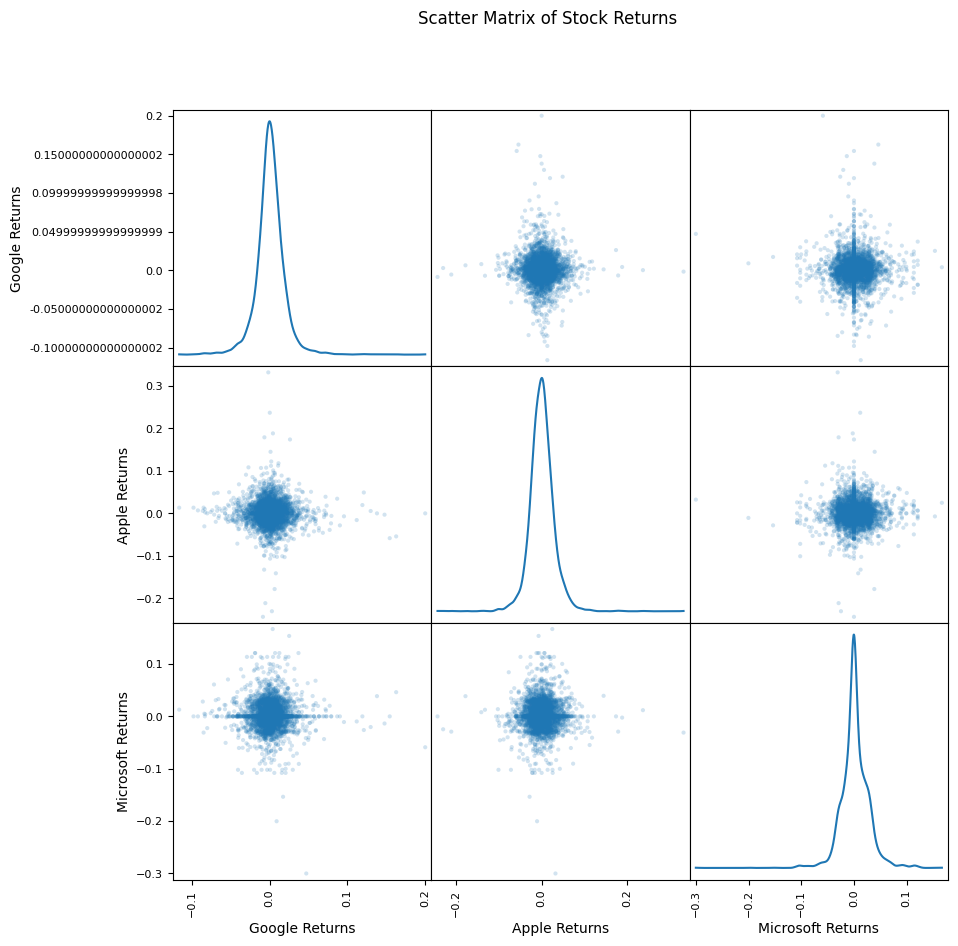

In [17]:
pd.plotting.scatter_matrix(returns, figsize=(10, 10), alpha=0.2, diagonal='kde')
plt.suptitle('Scatter Matrix of Stock Returns')
plt.show()


6. Bar Chart of Key Metrics


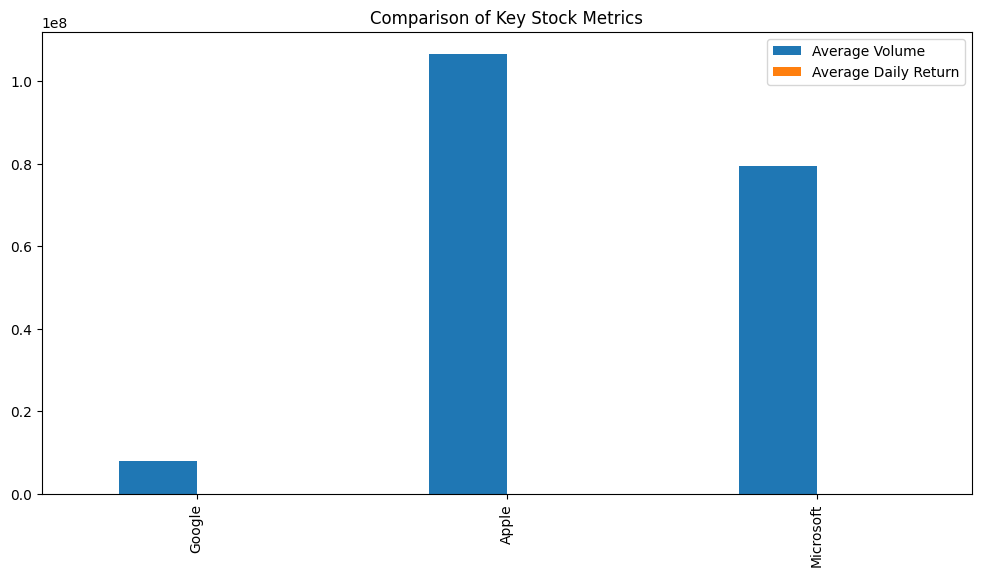

In [18]:
metrics = pd.DataFrame()
metrics['Average Volume'] = [google_data['Volume'].mean(), apple_data['Volume'].mean(), microsoft_data['Volume'].mean()]
metrics['Average Daily Return'] = [returns['Google Returns'].mean(), returns['Apple Returns'].mean(), returns['Microsoft Returns'].mean()]
metrics.index = ['Google', 'Apple', 'Microsoft']

metrics.plot.bar(figsize=(12,6))
plt.title('Comparison of Key Stock Metrics')
plt.show()
